In [26]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline


4
pylon_cal/1.png
pylon_cal/2.png
pylon_cal/3.png
pylon_cal/4.png


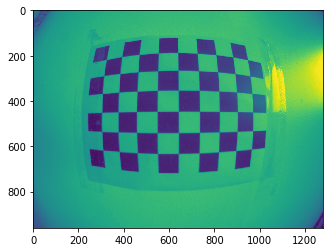

In [34]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('pylon_cal/*.png')
print (len(images))

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    print(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [31]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

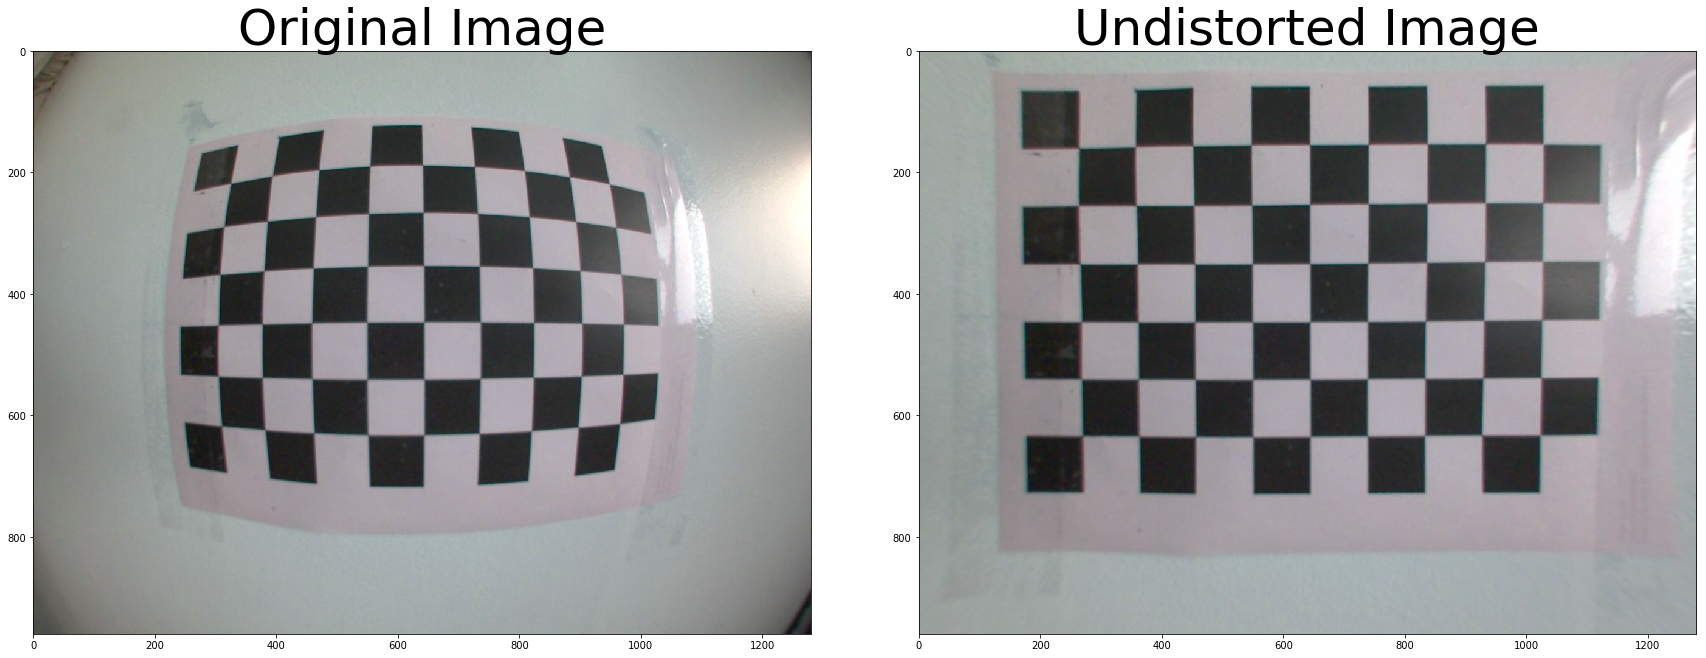

In [32]:
# Compare the images post undistort
img = cv2.imread('pylon_cal/4.png')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
undist = cv2.undistort(img, mtx, dist, None, mtx)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [33]:
# Save the correction metrics
import pickle
serialize = {"mtx" : mtx, "dist" : dist}

with open("calibrate_matrix.pickle", "wb") as f:
    pickle.dump(serialize, f)